In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

from model.nets import Siren
from model.flow import PipeFlow2D

In [2]:
Pn = [  complex(-0.5060,0.1245),
        complex(0.0802,0.0886),
        complex(0.0591,0.0251),
        complex(0.0228,0.0244),
        complex(0.0141,0.0071),
        complex(0.0112,0.0107),
        complex(0.0065,0.0056),
        complex(0.0067,0.0050),
        complex(0.0030,0.0040),
        complex(0.0044,0.0030),
        complex(0.0000,0.3710),
        complex(0.1493,0.0754),
        complex(0.0161,0.0103),
        complex(0.0166,0.0082),
        complex(-0.0002,0.0046),
        complex(0.0063,0.0001),
        complex(0.0008,0.0013),
        complex(0.0021,-0.0012),
        complex(0.0009,0.0015),
        complex(0.0001,-0.0001)]
pipe = PipeFlow2D(Po=-0.05,Pn=[complex(1,0.3),complex(-0.5,0.6),complex(0.1,0.1)],Wo=5)

In [3]:
Nx = 32
Nt = 32
x,y,t = np.meshgrid(np.linspace(0,8,4*Nx),np.linspace(-1,1,Nx),np.linspace(0,1,Nt))
u,v = pipe.velocity(x,y,t)
X = np.concatenate((x.reshape((Nx**2*4*Nt,1)),y.reshape((Nx**2*4*Nt,1)),t.reshape((Nx**2*4*Nt,1))),axis=1)
U = np.concatenate((u.reshape((Nx**2*4*Nt,1)),v.reshape((Nx**2*4*Nt,1))),axis=1)
X = torch.from_numpy(X).float().cuda()
U = torch.from_numpy(U).float().cuda()

In [4]:
net = Siren(in_features=3, out_features=2, hidden_features=256, 
                  hidden_layers=3, outermost_linear=True)
net.cuda()

Siren(
  (net): Sequential(
    (0): SineLayer(
      (linear): Linear(in_features=3, out_features=256, bias=True)
    )
    (1): SineLayer(
      (linear): Linear(in_features=256, out_features=256, bias=True)
    )
    (2): SineLayer(
      (linear): Linear(in_features=256, out_features=256, bias=True)
    )
    (3): SineLayer(
      (linear): Linear(in_features=256, out_features=256, bias=True)
    )
    (4): Linear(in_features=256, out_features=2, bias=True)
  )
)

In [5]:
total_steps = 2000

optim = torch.optim.Adam(lr=1e-4, params=net.parameters())

lam = 1

for step in range(total_steps):
    Up = net(X)
    dudx = net.jacobian(X,0,0)
    dvdy = net.jacobian(X,1,1)
    loss = ((U - Up)**2).mean()+lam*((dudx+dvdy)**2).mean()

    optim.zero_grad()
    loss.backward()
    optim.step()
    
    print("Loss " + str(step) + ": " + str(loss.item()))

Loss 0: 0.3757907450199127
Loss 1: 0.33291763067245483
Loss 2: 0.3178969919681549
Loss 3: 0.30935966968536377
Loss 4: 0.30431172251701355
Loss 5: 0.30065450072288513
Loss 6: 0.297769695520401
Loss 7: 0.2955900728702545
Loss 8: 0.29388922452926636
Loss 9: 0.2926299571990967
Loss 10: 0.2916293442249298
Loss 11: 0.29068031907081604
Loss 12: 0.2897682785987854
Loss 13: 0.28893446922302246
Loss 14: 0.28814181685447693
Loss 15: 0.28731828927993774
Loss 16: 0.28642576932907104
Loss 17: 0.2854599356651306
Loss 18: 0.2844182252883911
Loss 19: 0.28327929973602295
Loss 20: 0.28200656175613403
Loss 21: 0.28056198358535767
Loss 22: 0.2789117395877838
Loss 23: 0.2770158052444458
Loss 24: 0.2748120129108429
Loss 25: 0.27222248911857605
Loss 26: 0.2691703140735626
Loss 27: 0.26557138562202454
Loss 28: 0.26130884885787964
Loss 29: 0.2562316358089447
Loss 30: 0.25018852949142456
Loss 31: 0.2430167943239212
Loss 32: 0.2345399111509323
Loss 33: 0.2245817631483078
Loss 34: 0.213128462433815
Loss 35: 0.2002

Loss 270: 0.0025285230949521065
Loss 271: 0.002290666103363037
Loss 272: 0.0019585650879889727
Loss 273: 0.002195765497162938
Loss 274: 0.002095680683851242
Loss 275: 0.0018661904614418745
Loss 276: 0.0020350408740341663
Loss 277: 0.002021609805524349
Loss 278: 0.0018489010399207473
Loss 279: 0.0019250481855124235
Loss 280: 0.001931468490511179
Loss 281: 0.0017854267498478293
Loss 282: 0.001819302560761571
Loss 283: 0.0018750685267150402
Loss 284: 0.0018179388716816902
Loss 285: 0.0018755054334178567
Loss 286: 0.0020421133376657963
Loss 287: 0.002205256372690201
Loss 288: 0.002539473120123148
Loss 289: 0.003142495173960924
Loss 290: 0.003919724840670824
Loss 291: 0.004647346213459969
Loss 292: 0.0048612612299621105
Loss 293: 0.003938708454370499
Loss 294: 0.002594979014247656
Loss 295: 0.002274123951792717
Loss 296: 0.0030924121383577585
Loss 297: 0.003671577200293541
Loss 298: 0.003193313255906105
Loss 299: 0.0026928510051220655
Loss 300: 0.0029100715182721615
Loss 301: 0.003196490462

Loss 530: 0.001335976063273847
Loss 531: 0.0014127211179584265
Loss 532: 0.0014901558170095086
Loss 533: 0.001101591857150197
Loss 534: 0.0009535018471069634
Loss 535: 0.0010073527228087187
Loss 536: 0.0008787219994701445
Loss 537: 0.0008713860297575593
Loss 538: 0.0009708373108878732
Loss 539: 0.0008992300718091428
Loss 540: 0.0008372110314667225
Loss 541: 0.0008489021565765142
Loss 542: 0.0008043447160162032
Loss 543: 0.0008114773663692176
Loss 544: 0.0008548607584089041
Loss 545: 0.0008123692241497338
Loss 546: 0.000777918437961489
Loss 547: 0.000793451676145196
Loss 548: 0.0007596167270094156
Loss 549: 0.0007285395404323936
Loss 550: 0.0007468778640031815
Loss 551: 0.0007384843192994595
Loss 552: 0.0007103366078808904
Loss 553: 0.0007288196356967092
Loss 554: 0.0007508766138926148
Loss 555: 0.0007517507183365524
Loss 556: 0.0007773252436891198
Loss 557: 0.0008330013952217996
Loss 558: 0.0008983822772279382
Loss 559: 0.0010035809827968478
Loss 560: 0.0011670219246298075
Loss 561: 0.

Loss 788: 0.0013400070602074265
Loss 789: 0.001026359386742115
Loss 790: 0.002306130714714527
Loss 791: 0.0029459514189511538
Loss 792: 0.0020277563016861677
Loss 793: 0.0011121981078758836
Loss 794: 0.0015229348791763186
Loss 795: 0.001925971359014511
Loss 796: 0.0011740103363990784
Loss 797: 0.000639850040897727
Loss 798: 0.0010396530851721764
Loss 799: 0.0011920641409233212
Loss 800: 0.0007864768849685788
Loss 801: 0.0007743648020550609
Loss 802: 0.0010356782004237175
Loss 803: 0.0008271350525319576
Loss 804: 0.000531739613506943
Loss 805: 0.000662075006403029
Loss 806: 0.0007182277040556073
Loss 807: 0.0005196366691961884
Loss 808: 0.0005358716007322073
Loss 809: 0.0006665537366643548
Loss 810: 0.0005409347359091043
Loss 811: 0.000416378490626812
Loss 812: 0.0005037694936618209
Loss 813: 0.000523164460901171
Loss 814: 0.00041853668517433107
Loss 815: 0.0004229160840623081
Loss 816: 0.0004894532030448318
Loss 817: 0.00044461191282607615
Loss 818: 0.00038565328577533364
Loss 819: 0.0

Loss 1044: 0.00036581099266186357
Loss 1045: 0.0004269361379556358
Loss 1046: 0.00043731770711019635
Loss 1047: 0.0004035394231323153
Loss 1048: 0.00038125040009617805
Loss 1049: 0.0003533063572831452
Loss 1050: 0.00032139552058652043
Loss 1051: 0.00032302975887432694
Loss 1052: 0.00034800058347173035
Loss 1053: 0.0003486427594907582
Loss 1054: 0.0003226960834581405
Loss 1055: 0.0003013825335074216
Loss 1056: 0.0002850891323760152
Loss 1057: 0.00026897081988863647
Loss 1058: 0.0002642131003085524
Loss 1059: 0.0002705422812141478
Loss 1060: 0.00027293380117043853
Loss 1061: 0.00026826048269867897
Loss 1062: 0.0002626570058055222
Loss 1063: 0.00025680416729301214
Loss 1064: 0.000251993362326175
Loss 1065: 0.0002522603317629546
Loss 1066: 0.0002571623190306127
Loss 1067: 0.0002619842125568539
Loss 1068: 0.0002664364583324641
Loss 1069: 0.00027480736025609076
Loss 1070: 0.000288855197140947
Loss 1071: 0.00031323899747803807
Loss 1072: 0.00035614921944215894
Loss 1073: 0.0004292652010917663

Loss 1292: 0.00042903306894004345
Loss 1293: 0.00047822087071835995
Loss 1294: 0.00047370651736855507
Loss 1295: 0.0004379982128739357
Loss 1296: 0.00042583729373291135
Loss 1297: 0.0004520645015873015
Loss 1298: 0.00047001062193885446
Loss 1299: 0.00046524472418241203
Loss 1300: 0.00044507114216685295
Loss 1301: 0.0004452417488209903
Loss 1302: 0.00045211546239443123
Loss 1303: 0.000450582941994071
Loss 1304: 0.0004223353462293744
Loss 1305: 0.00038856943137943745
Loss 1306: 0.0003573780704755336
Loss 1307: 0.000334389042109251
Loss 1308: 0.0003066183999180794
Loss 1309: 0.0002780804061330855
Loss 1310: 0.00025656743673607707
Loss 1311: 0.0002537350810598582
Loss 1312: 0.00026496703503653407
Loss 1313: 0.000285227142740041
Loss 1314: 0.00031103030778467655
Loss 1315: 0.00034994681482203305
Loss 1316: 0.00041051735752262175
Loss 1317: 0.0004951127921231091
Loss 1318: 0.0006048031500540674
Loss 1319: 0.0007388329831883311
Loss 1320: 0.000895984354428947
Loss 1321: 0.0010768364882096648


Loss 1540: 0.0010101530933752656
Loss 1541: 0.0011665790807455778
Loss 1542: 0.0012506304774433374
Loss 1543: 0.0012135615106672049
Loss 1544: 0.001036016852594912
Loss 1545: 0.0007575822528451681
Loss 1546: 0.00050260906573385
Loss 1547: 0.00040064475615508854
Loss 1548: 0.0004855135048273951
Loss 1549: 0.0006816972745582461
Loss 1550: 0.0008607456693425775
Loss 1551: 0.0009074026020243764
Loss 1552: 0.0008362892549484968
Loss 1553: 0.0007114410400390625
Loss 1554: 0.0006373346550390124
Loss 1555: 0.0006228434504009783
Loss 1556: 0.0005973836523480713
Loss 1557: 0.0005127729382365942
Loss 1558: 0.00038074023905210197
Loss 1559: 0.0002831601304933429
Loss 1560: 0.0002770734135992825
Loss 1561: 0.00035675260005518794
Loss 1562: 0.00046453136019408703
Loss 1563: 0.0005547296022996306
Loss 1564: 0.0006269175792112947
Loss 1565: 0.0007208363967947662
Loss 1566: 0.0008605637704022229
Loss 1567: 0.0010604282142594457
Loss 1568: 0.0012633017031475902
Loss 1569: 0.00145115633495152
Loss 1570: 

Loss 1788: 0.0001394252758473158
Loss 1789: 0.00014330365229398012
Loss 1790: 0.00015121072647161782
Loss 1791: 0.00016285994206555188
Loss 1792: 0.0001813070266507566
Loss 1793: 0.00020937417866662145
Loss 1794: 0.0002537568216212094
Loss 1795: 0.00031887058867141604
Loss 1796: 0.00042151263915002346
Loss 1797: 0.0005697197047993541
Loss 1798: 0.0007947047706693411
Loss 1799: 0.001082867500372231
Loss 1800: 0.0014514286303892732
Loss 1801: 0.001772683346644044
Loss 1802: 0.0019660014659166336
Loss 1803: 0.0018229130655527115
Loss 1804: 0.001443785149604082
Loss 1805: 0.001126762363128364
Loss 1806: 0.0012475724797695875
Loss 1807: 0.0018184393411502242
Loss 1808: 0.0022301129065454006
Loss 1809: 0.002136480063199997
Loss 1810: 0.0013904684456065297
Loss 1811: 0.0008114705560728908
Loss 1812: 0.0007934054592624307
Loss 1813: 0.0009579708566889167
Loss 1814: 0.0009054061956703663
Loss 1815: 0.0007110967417247593
Loss 1816: 0.0006655559991486371
Loss 1817: 0.0006503878394141793
Loss 1818

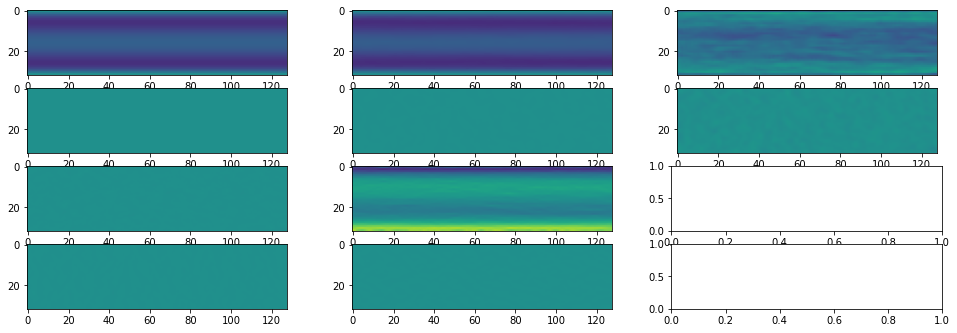

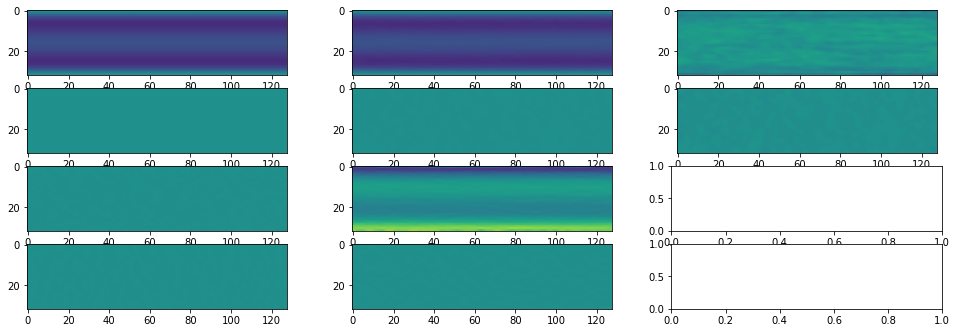

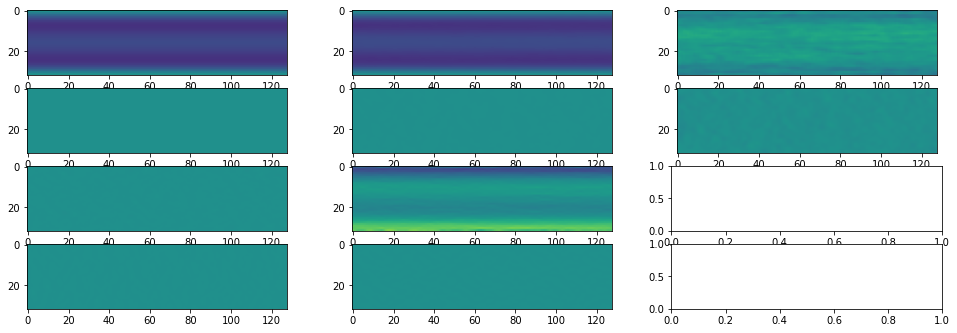

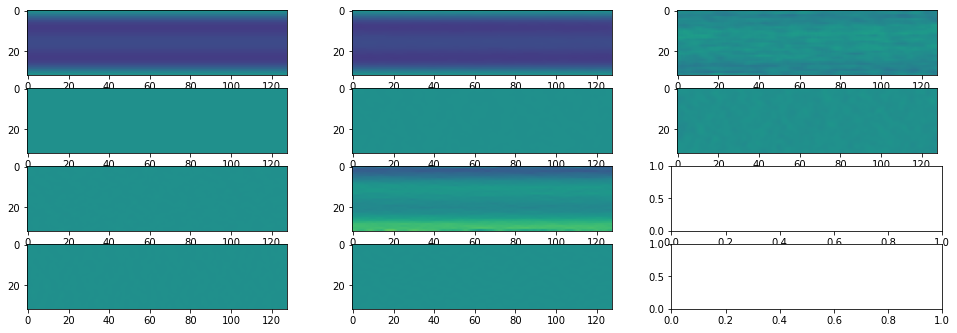

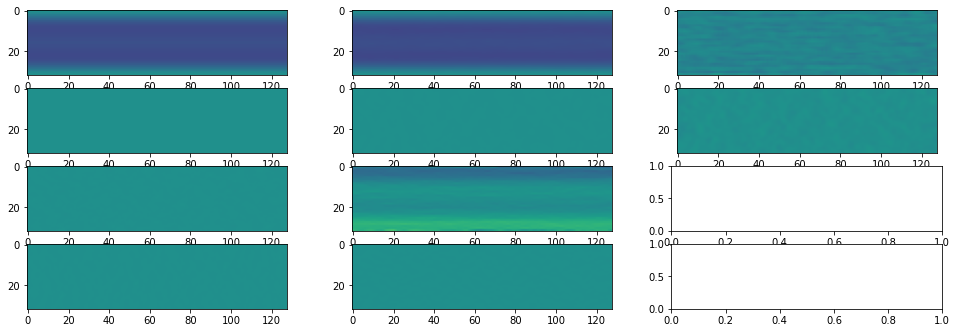

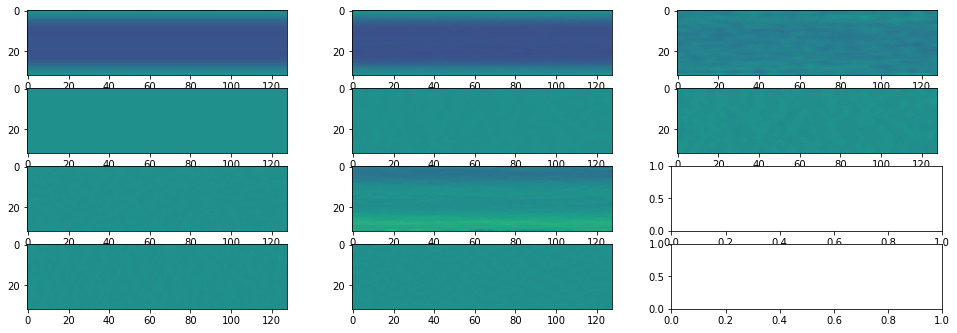

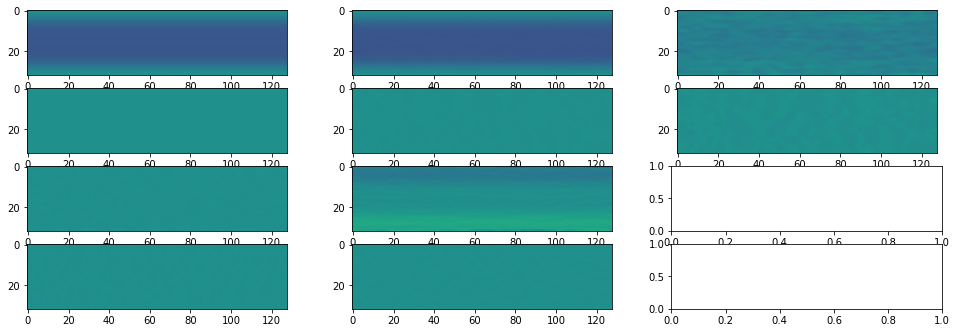

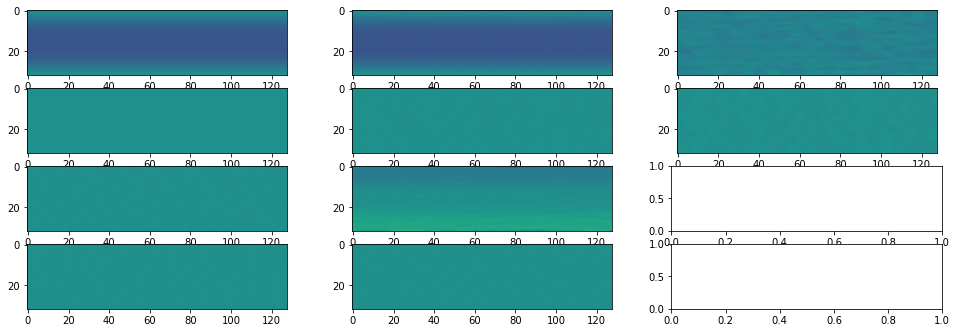

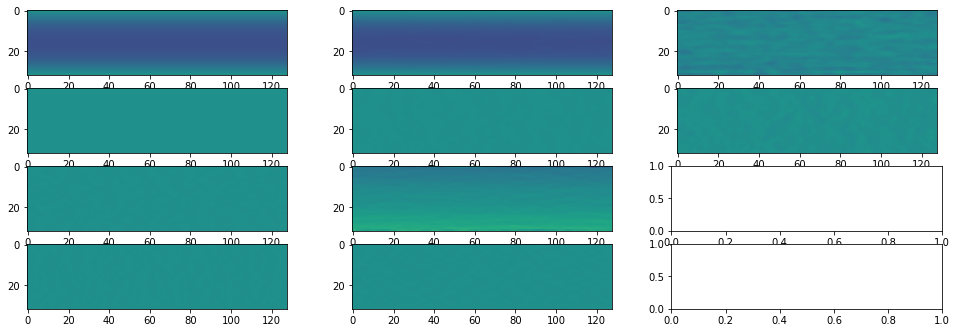

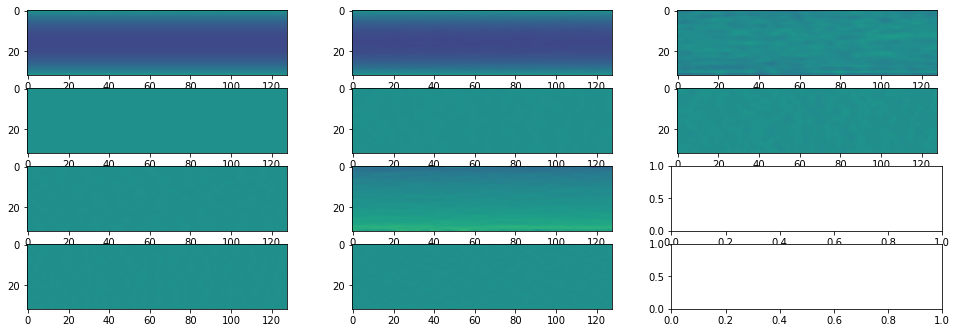

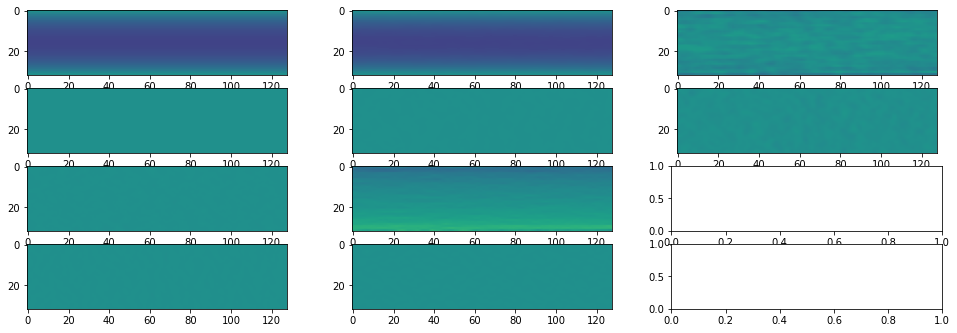

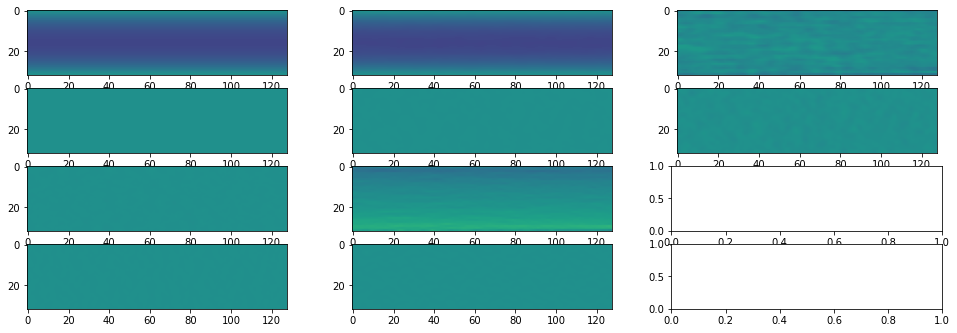

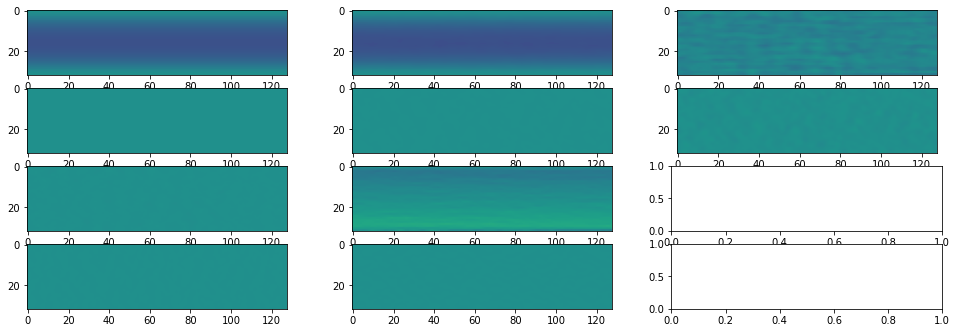

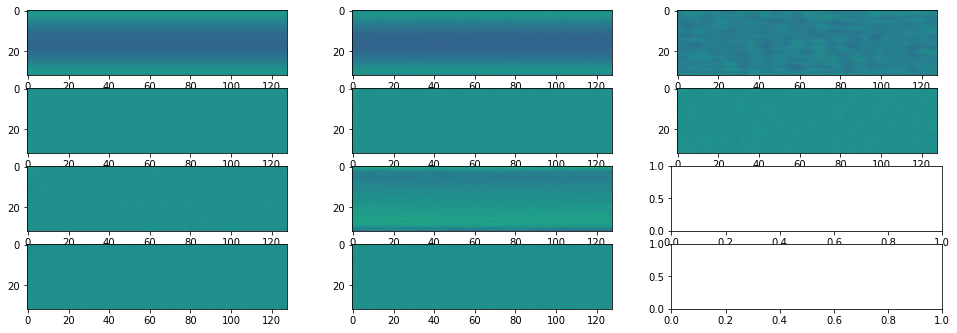

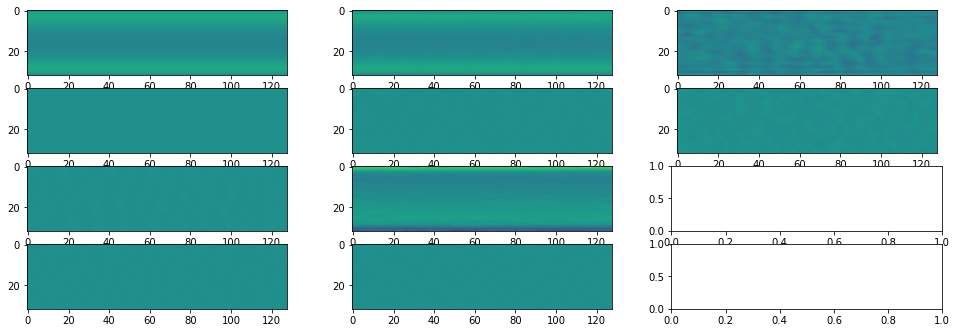

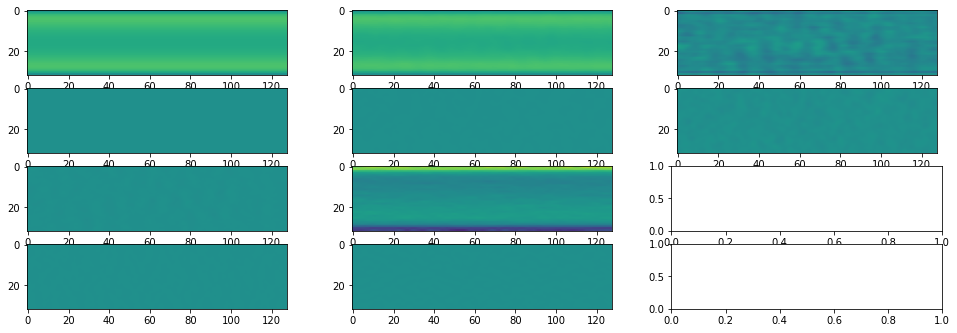

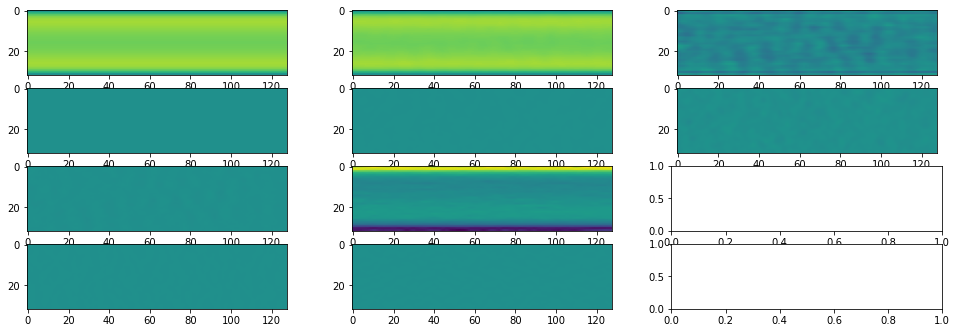

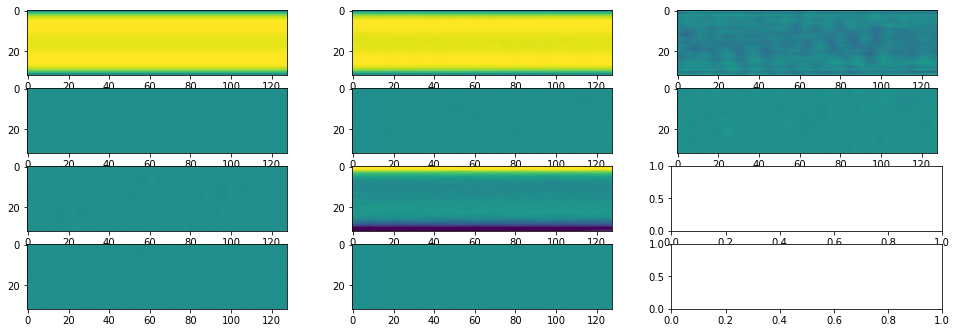

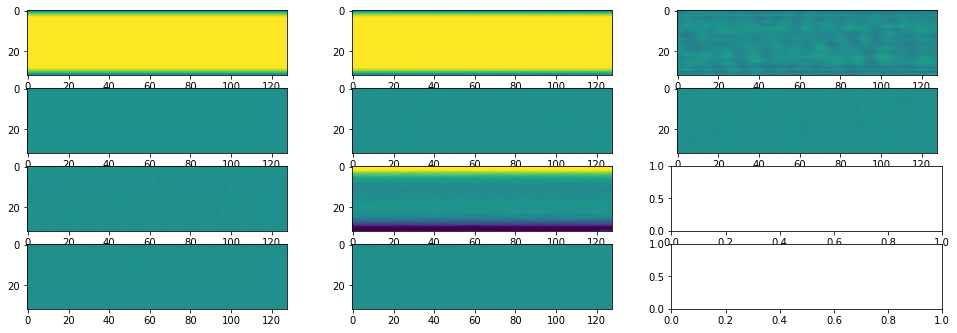

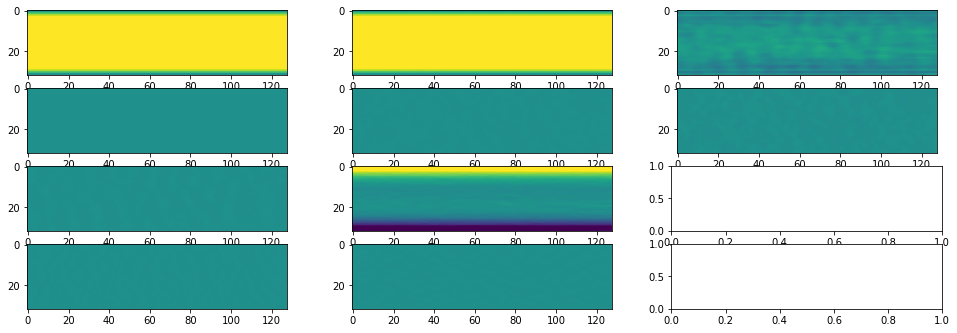

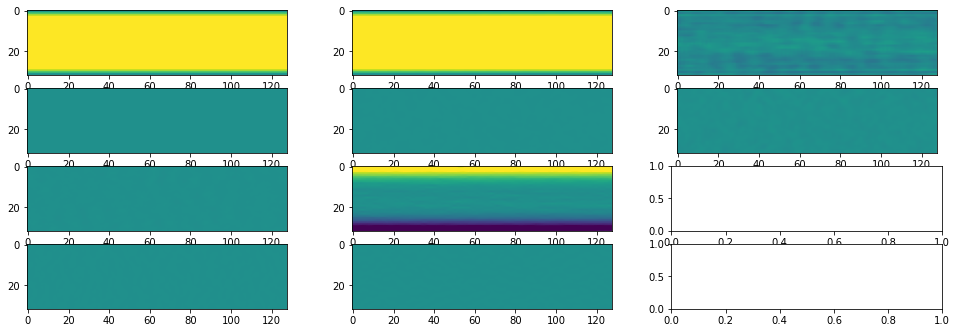

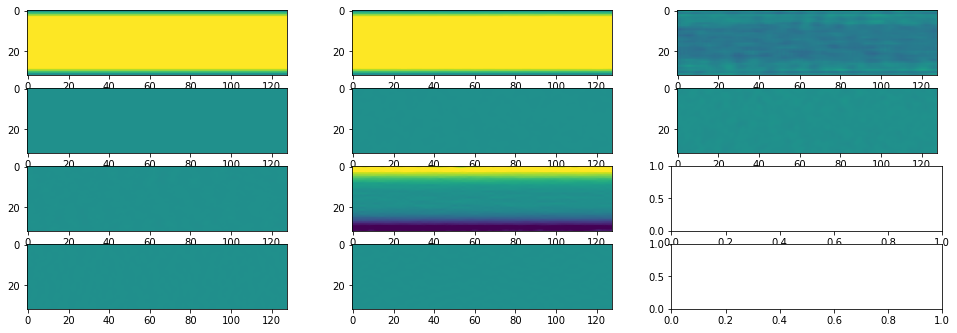

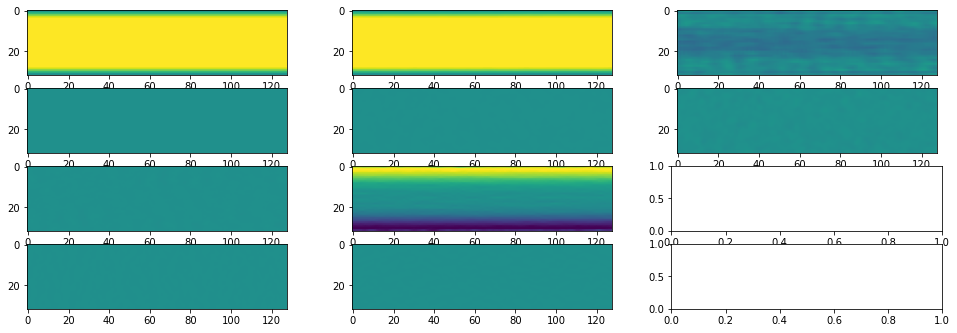

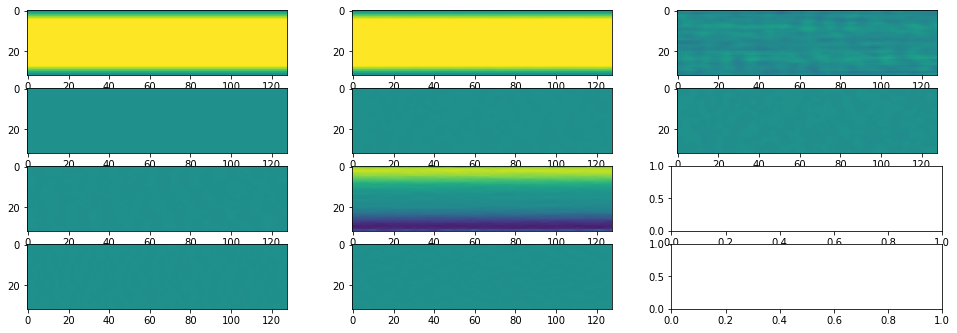

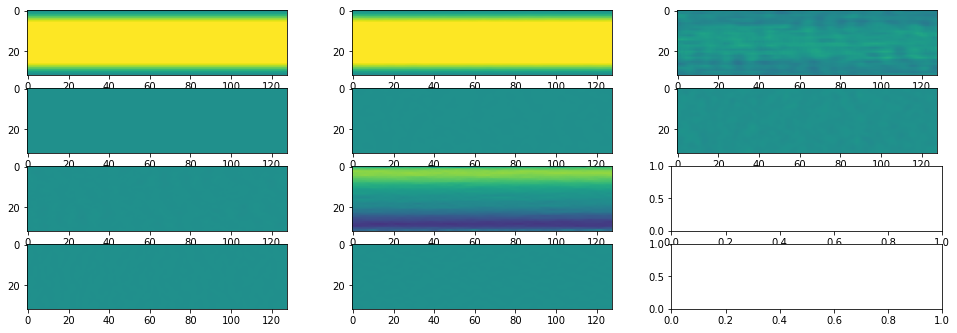

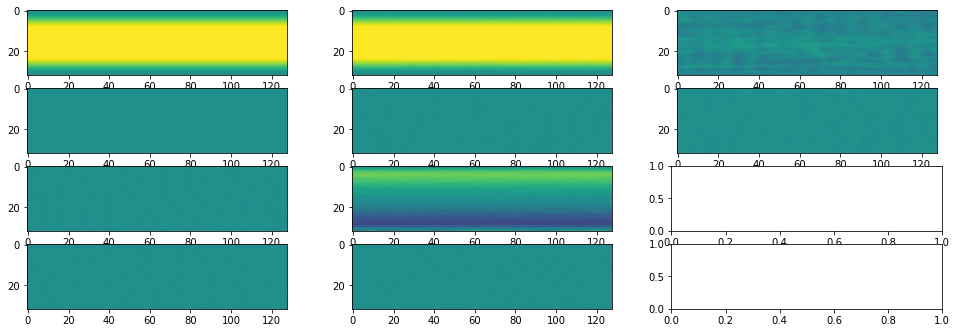

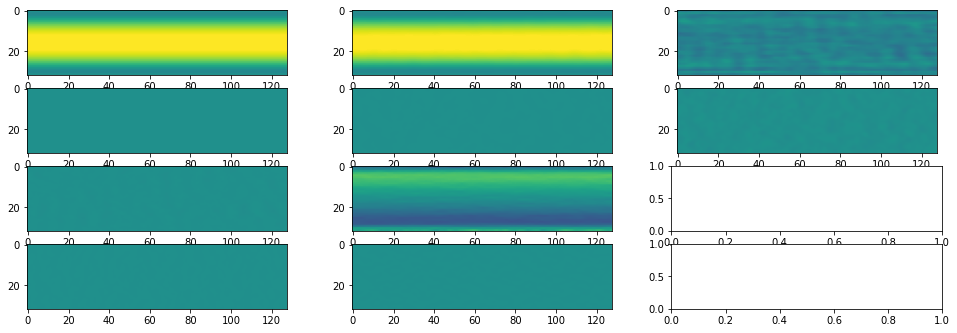

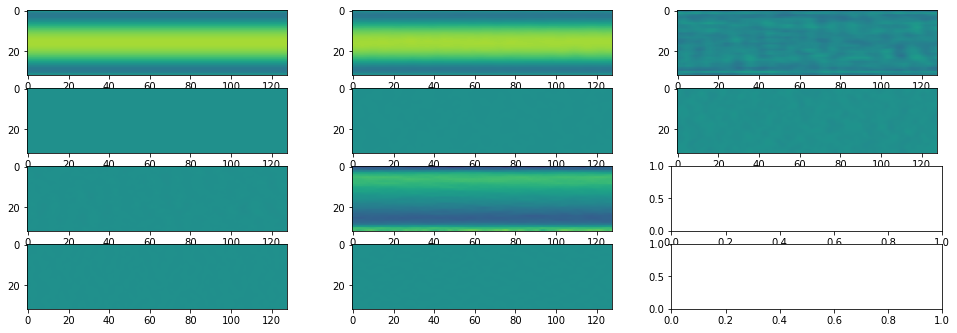

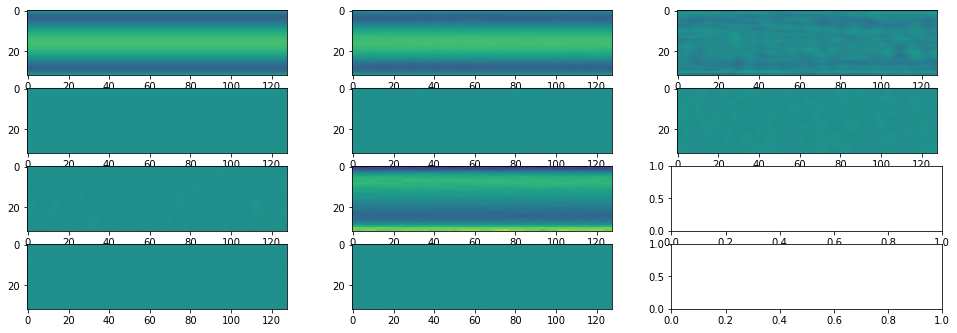

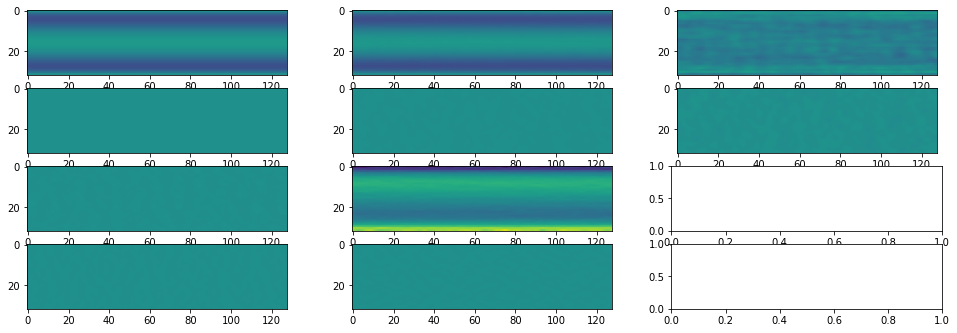

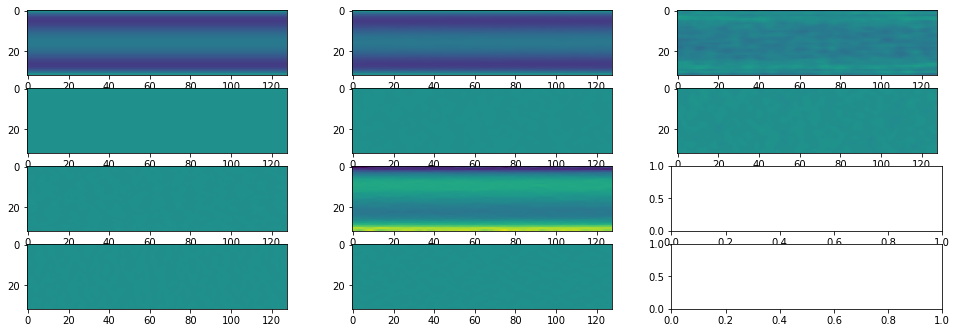

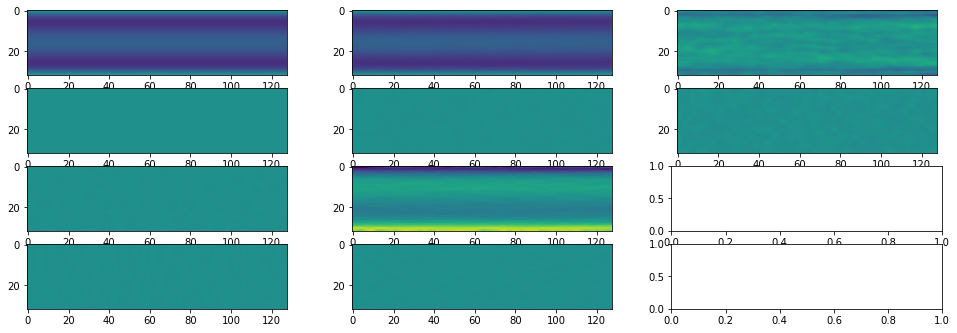

In [7]:
Nxt = 32
Ntt = Nt
xt,yt,tt = np.meshgrid(np.linspace(0,8,4*Nxt),np.linspace(-1,1,Nxt),np.linspace(0,1,Ntt))
ut,vt = pipe.velocity(xt,yt,tt)
Xt = np.concatenate((xt.reshape((Nxt**2*4*Ntt,1)),yt.reshape((Nxt**2*4*Ntt,1)),tt.reshape((Nxt**2*4*Ntt,1))),axis=1)
Xt = torch.from_numpy(Xt).float().cuda()
Upt = net(Xt)

dudx = net.jacobian(Xt,0,0)
dudy = net.jacobian(Xt,0,1)
dvdx = net.jacobian(Xt,1,0)
dvdy = net.jacobian(Xt,1,1)
dudx = dudx.cpu().detach().numpy().reshape((Nxt,4*Nxt,Ntt))
dudy = dudy.cpu().detach().numpy().reshape((Nxt,4*Nxt,Ntt))
dvdx = dvdx.cpu().detach().numpy().reshape((Nxt,4*Nxt,Ntt))
dvdy = dvdy.cpu().detach().numpy().reshape((Nxt,4*Nxt,Ntt))

Upt = Upt.cpu().detach().numpy().reshape((Nxt,4*Nxt,Ntt,2))
upt = Upt[:,:,:,0]
vpt = Upt[:,:,:,1]
for tn in np.arange(Nt):
    fig, axes = plt.subplots(4,3, figsize=(16.5,5.5))
    axes[0,0].imshow(ut[:,:,tn],vmin=-1,vmax=1)
    axes[0,1].imshow(upt[:,:,tn],vmin=-1,vmax=1)
    axes[0,2].imshow(upt[:,:,tn]-ut[:,:,tn],vmin=-0.1,vmax=0.1)
    axes[1,0].imshow(vt[:,:,tn],vmin=-1,vmax=1)
    axes[1,1].imshow(vpt[:,:,tn],vmin=-1,vmax=1)
    axes[1,2].imshow(vpt[:,:,tn]-vt[:,:,tn],vmin=-0.1,vmax=0.1)
    axes[2,0].imshow(dudx[:,:,tn],vmin=-5,vmax=5)
    axes[2,1].imshow(dudy[:,:,tn],vmin=-5,vmax=5)
    axes[3,0].imshow(dvdx[:,:,tn],vmin=-5,vmax=5)
    axes[3,1].imshow(dvdy[:,:,tn],vmin=-5,vmax=5)
    
    plt.show()